In [10]:
results = {  
    "LGBM_result": {  
        "IC": 0.04993199298180833,  
        "ICIR": 0.401166594497036,  
        "Rank IC": 0.051506972472517176,  
        "Rank ICIR": 0.41964587176278606,  
        "ERWC_AR": 0.17808847786474435,  
        "ERWC_IR": 2.029781086376785,  
    },  
    "Master_result": {  
        "IC": 0.06221125738364682,  
        "ICIR": 0.4089395569850118,  
        "Rank IC": 0.07537232888943195,  
        "Rank ICIR": 0.500439035041941,  
        "ERWC_AR": 0.1829883949498608,  
        "ERWC_IR": 1.8468949496149516,  
    },  
    "XGBoost_result": {  
        "IC": 0.05025481658813131,  
        "ICIR": 0.38420942771966826,  
        "Rank IC": 0.048190000441132384,  
        "Rank ICIR": 0.4009205584844637,  
        "ERWC_AR": 0.15646559464004772,  
        "ERWC_IR": 1.8196832888802212,  
    },  
}  

print(results)  

{'LGBM_result': {'IC': 0.04993199298180833, 'ICIR': 0.401166594497036, 'Rank IC': 0.051506972472517176, 'Rank ICIR': 0.41964587176278606, '1day_excess_return_without_cost_annualized_return': 0.17808847786474435, '1day_excess_return_without_cost_information_ratio': 2.029781086376785}, 'Master_result': {'IC': 0.06221125738364682, 'ICIR': 0.4089395569850118, 'Rank IC': 0.07537232888943195, 'Rank ICIR': 0.500439035041941, '1day_excess_return_without_cost_annualized_return': 0.1829883949498608, '1day_excess_return_without_cost_information_ratio': 1.8468949496149516}, 'XGBoost_result': {'IC': 0.05025481658813131, 'ICIR': 0.38420942771966826, 'Rank IC': 0.048190000441132384, 'Rank ICIR': 0.4009205584844637, '1day_excess_return_without_cost_annualized_return': 0.15646559464004772, '1day_excess_return_without_cost_information_ratio': 1.8196832888802212}}


In [ ]:
# Extract models and metrics  
models = list(results.keys())  
metrics = [  
    "IC", "ICIR", "Rank IC", "Rank ICIR",   
    "ERWC_AR", "ERWC_IR"  
]  
metric_labels = {  
    "IC": "Information Coefficient (IC)",  
    "ICIR": "Information Coefficient Information Ratio (ICIR)",  
    "Rank IC": "Rank Information Coefficient",  
    "Rank ICIR": "Rank Information Coefficient IR",  
    "ERWC_AR": "Annualized Return (No Cost)",  
    "ERWC_IR": "Information Ratio (No Cost)"  
}  

# Prepare data for easier reuse  
data = {metric: [results[model][metric] for model in models] for metric in metrics}  

# Generate a series of bar plots for each metric  
plt.figure(figsize=(16, 12))  # 调整图形大小（宽16，高12）
for i, metric in enumerate(metrics, 1):  
    plt.subplot(2, 3, i)  # 每行2行3列布局 - (2 rows, 3 columns)
    plt.bar(models, data[metric], color=["skyblue", "orange", "green"], alpha=0.8)  
    plt.title(metric_labels[metric], fontsize=14)  
    plt.ylabel("Value", fontsize=12)  
    plt.xticks(ticks=np.arange(len(models)), labels=["LGBM", "MASTER", "XGBoost"], fontsize=12)  
    plt.grid(axis="y", linestyle="--", alpha=0.6)  

# Adjust layout and show plots  
plt.tight_layout()    # 调整布局，避免过于紧凑或重叠  
plt.suptitle("Model Evaluation: Metric Comparisons", fontsize=18, y=1.02)  # 添加全局标题
plt.show()  


KeyError: 'ERWC_AR'

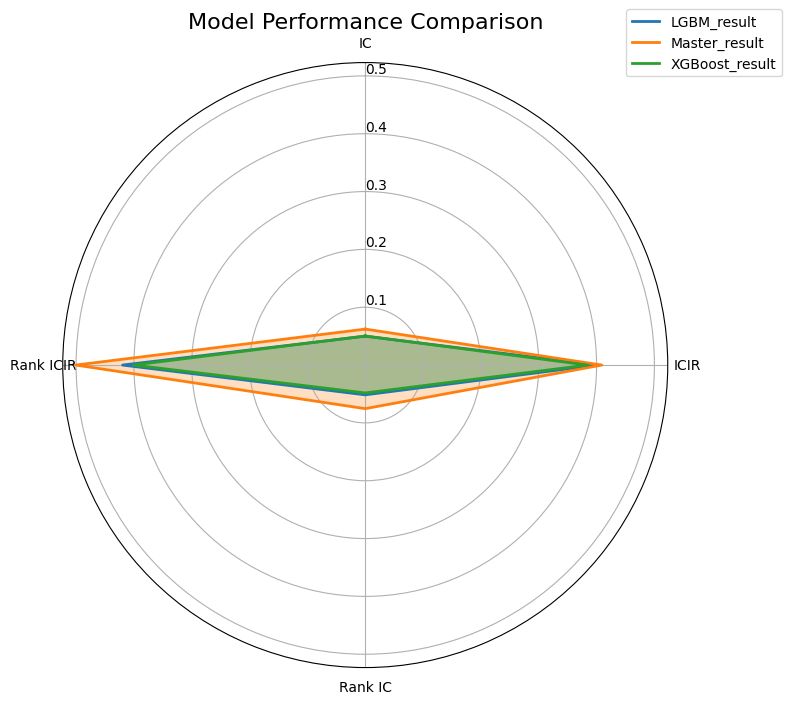

In [34]:

    import matplotlib.pyplot as plt
    import numpy as np

    # Data
    results = {
        "LGBM_result": {
            "IC": 0.04993199298180833,
            "ICIR": 0.401166594497036,
            "Rank IC": 0.051506972472517176,
            "Rank ICIR": 0.41964587176278606,
            # "ERWC_AR": 0.17808847786474435,
            # "ERWC_IR": 2.029781086376785,
        },
        "Master_result": {
            "IC": 0.06221125738364682,
            "ICIR": 0.4089395569850118,
            "Rank IC": 0.07537232888943195,
            "Rank ICIR": 0.500439035041941,
            # "ERWC_AR": 0.1829883949498608,
            # "ERWC_IR": 1.8468949496149516,
        },
        "XGBoost_result": {
            "IC": 0.05025481658813131,
            "ICIR": 0.38420942771966826,
            "Rank IC": 0.048190000441132384,
            "Rank ICIR": 0.4009205584844637,
            # "ERWC_AR": 0.15646559464004772,
            # "ERWC_IR": 1.8196832888802212,
        },
    }

    # Extract values for radar chart
    metrics = list(results["LGBM_result"].keys())
    labels = list(results.keys())
    num_metrics = len(metrics)

    # Normalize the values for better comparison (optional, can skip normalization if metrics are on a comparable scale)
    normalized_results = {}
    for model, metrics_values in results.items():
        normalized_results[model] = [metrics_values[metric] for metric in metrics]

    # Prepare data for plot
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    angles += angles[:1]  # Rotate to complete the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Add each model's data to the radar chart
    for model, values in normalized_results.items():
        values += values[:1]  # Complete the circle
        ax.plot(angles, values, label=model, linewidth=2)
        ax.fill(angles, values, alpha=0.25)

    # Set the legend and labels
    ax.set_title("Model Performance Comparison", fontsize=16)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=10)
    ax.set_rlabel_position(0)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), fontsize=10)

    # Show the chart
    plt.tight_layout()
    plt.show()


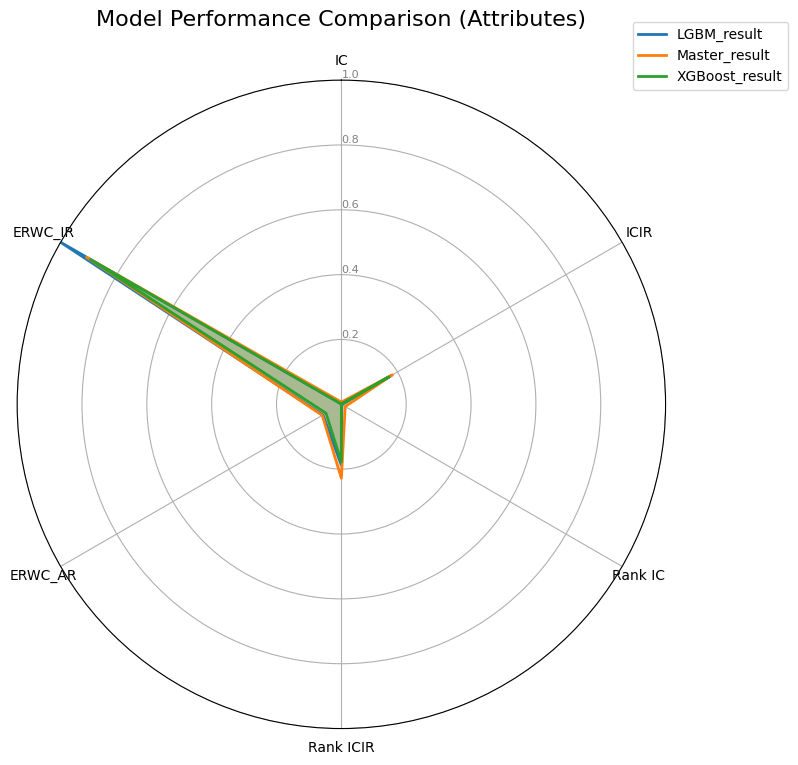

In [35]:
import matplotlib.pyplot as plt  
import numpy as np  

# Data  
results = {  
    "LGBM_result": {  
        "IC": 0.04993199298180833,  
        "ICIR": 0.401166594497036,  
        "Rank IC": 0.051506972472517176,  
        "Rank ICIR": 0.41964587176278606,  
        "ERWC_AR": 0.17808847786474435,  
        "ERWC_IR": 2.029781086376785,  
    },  
    "Master_result": {  
        "IC": 0.06221125738364682,  
        "ICIR": 0.4089395569850118,  
        "Rank IC": 0.07537232888943195,  
        "Rank ICIR": 0.500439035041941,  
        "ERWC_AR": 0.1829883949498608,  
        "ERWC_IR": 1.8468949496149516,  
    },  
    "XGBoost_result": {  
        "IC": 0.05025481658813131,  
        "ICIR": 0.38420942771966826,  
        "Rank IC": 0.048190000441132384,  
        "Rank ICIR": 0.4009205584844637,  
        "ERWC_AR": 0.15646559464004772,  
        "ERWC_IR": 1.8196832888802212,  
    },  
}  

# Prepare metrics and normalize data to [0, 1] range for fair comparison  
metrics = list(results["LGBM_result"].keys())  
models = list(results.keys())  

# Flatten all values to find global min and max for normalization  
all_values = [results[model][metric] for model in models for metric in metrics]  
min_val, max_val = min(all_values), max(all_values)  

def normalize(value, min_val, max_val):  
    return (value - min_val) / (max_val - min_val)  

# Normalize data  
normalized_results = {  
    model: [normalize(results[model][metric], min_val, max_val) for metric in metrics]  
    for model in models  
}  

# Prepare data for radar chart  
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()  
angles += angles[:1]  # To close the circle  

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))  

# Plot each model's performance  
for model, values in normalized_results.items():  
    values += values[:1]  # Close the circle  
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)  
    ax.fill(angles, values, alpha=0.25)  

# Add labels and title  
ax.set_theta_offset(np.pi / 2)  
ax.set_theta_direction(-1)  
ax.set_xticks(angles[:-1])  
ax.set_xticklabels(metrics, fontsize=10)  
ax.set_rlabel_position(0)  
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])  
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], color="gray", fontsize=8)  
ax.set_ylim(0, 1)  

plt.title("Model Performance Comparison (Attributes)", fontsize=16, pad=20)  
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), fontsize=10)  

# Show radar chart  
plt.tight_layout()  
plt.show()  

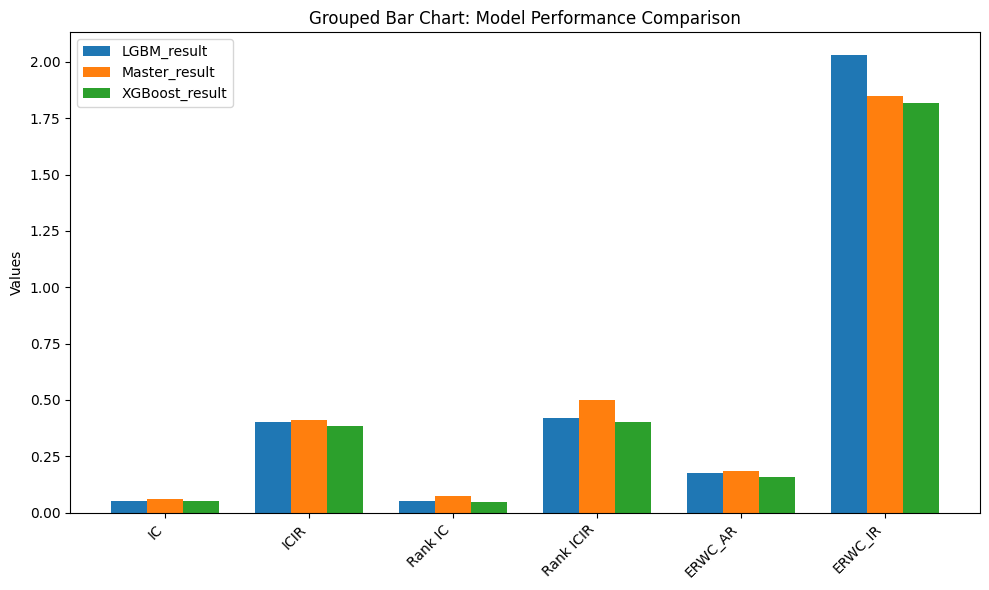

In [36]:
import matplotlib.pyplot as plt  
import numpy as np  

# 数据  
results = {  
    "LGBM_result": {  
        "IC": 0.04993199298180833,  
        "ICIR": 0.401166594497036,  
        "Rank IC": 0.051506972472517176,  
        "Rank ICIR": 0.41964587176278606,  
        "ERWC_AR": 0.17808847786474435,  
        "ERWC_IR": 2.029781086376785,  
    },  
    "Master_result": {  
        "IC": 0.06221125738364682,  
        "ICIR": 0.4089395569850118,  
        "Rank IC": 0.07537232888943195,  
        "Rank ICIR": 0.500439035041941,  
        "ERWC_AR": 0.1829883949498608,  
        "ERWC_IR": 1.8468949496149516,  
    },  
    "XGBoost_result": {  
        "IC": 0.05025481658813131,  
        "ICIR": 0.38420942771966826,  
        "Rank IC": 0.048190000441132384,  
        "Rank ICIR": 0.4009205584844637,  
        "ERWC_AR": 0.15646559464004772,  
        "ERWC_IR": 1.8196832888802212,  
    },  
}  

# 提取指标与模型  
metrics = list(results["LGBM_result"].keys())  
models = list(results.keys())  
values = {model: [results[model][metric] for metric in metrics] for model in models}  

# x偏移和组大小  
x = np.arange(len(metrics))  
bar_width = 0.25  

# 创建柱状图  
fig, ax = plt.subplots(figsize=(10, 6))  

for i, (model, data) in enumerate(values.items()):  
    ax.bar(x + i * bar_width, data, width=bar_width, label=model)  

# 设置标注和样式  
ax.set_xticks(x + bar_width)  
ax.set_xticklabels(metrics, rotation=45, ha="right")  
ax.set_ylabel('Values')  
ax.set_title('Grouped Bar Chart: Model Performance Comparison')  
ax.legend()  

plt.tight_layout()  
plt.show()  